In [232]:
import pandas as pd
# ignore unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [233]:
df = pd.read_csv('supershops.csv')

In [234]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [235]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()
df4 = df.copy()
df5 = df.copy()
df6 = df.copy()
df7 = df.copy()
df8 = df.copy()
df9 = df.copy()

In [236]:
x = df.drop('Profit', axis=1)

In [237]:
x.head()

,Marketing Spend,Administration,Transport,Area
0,114523.61,136897.80,471784.10,Dhaka
1,162597.70,151377.59,443898.53,Ctg
2,153441.51,101145.55,407934.54,Rangpur
3,144372.41,118671.85,383199.62,Dhaka
4,142107.34,91391.77,366168.42,Rangpur


In [238]:
y = df['Profit']

In [239]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [240]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          1
Area               0
Profit             0
dtype: int64

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        49 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [242]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.57,Rangpur,124266.90
19,86419.70,153514.11,NaN,Dhaka,122776.86
20,76253.86,113867.30,298664.47,Ctg,118474.03


In [243]:
# measure of central tendency
df.Transport.mean()

215331.7324489796

In [244]:
df.Transport.median()

214634.81

<Axes: xlabel='Transport', ylabel='Count'>

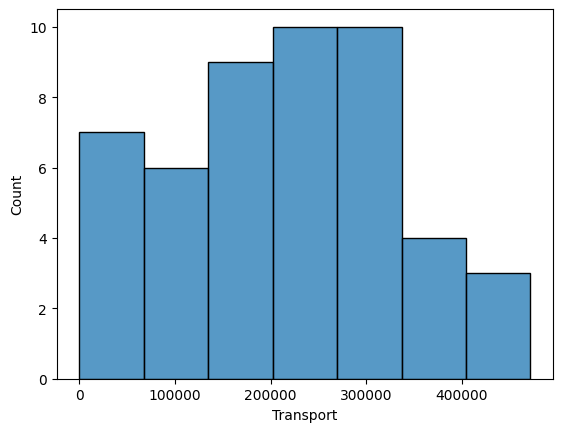

In [245]:
import seaborn as sns
sns.histplot(df.Transport)

In [246]:
mean = df.Transport.mean()
mean

215331.7324489796

In [247]:
df.Transport = df.Transport.fillna(mean)

In [248]:
df[18:21]

,Marketing Spend,Administration,Transport,Area,Profit
18,91749.16,114175.79,294919.570000,Rangpur,124266.90
19,86419.70,153514.11,215331.732449,Dhaka,122776.86
20,76253.86,113867.30,298664.470000,Ctg,118474.03


In [249]:
df.isnull().sum()

Marketing Spend    0
Administration     0
Transport          0
Area               0
Profit             0
dtype: int64

## Sklearn Prepocessing

In [250]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [251]:
from sklearn.preprocessing import LabelEncoder

In [252]:
le = LabelEncoder()

In [253]:
df1.Area.head()

0      Dhaka
1        Ctg
2    Rangpur
3      Dhaka
4    Rangpur
Name: Area, dtype: object

In [254]:
df1.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [255]:
df1.Area = le.fit_transform(df[['Area']])

In [256]:
df1.Area.head()

0    1
1    0
2    2
3    1
4    2
Name: Area, dtype: int32

In [257]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [258]:
le.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype=object)

In [259]:
le.transform(le.classes_)

array([0, 1, 2])

## Decode the encoding values back to original classes

In [260]:
decoded_classes = le.inverse_transform(df1.Area)
decoded_classes

array(['Dhaka', 'Ctg', 'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg', 'Rangpur', 'Ctg',
       'Rangpur', 'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg',
       'Dhaka', 'Rangpur', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Dhaka',
       'Rangpur', 'Dhaka', 'Rangpur', 'Dhaka', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg', 'Ctg', 'Rangpur', 'Ctg',
       'Dhaka', 'Ctg', 'Dhaka', 'Rangpur', 'Ctg', 'Dhaka', 'Ctg'],
      dtype=object)

In [261]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [262]:
df1.Area = decoded_classes

In [263]:
df1.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


## Label Encoding with Label mapping

In [264]:
df.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [265]:
label_mapping = {
    'Dhaka': 1,
    'Rangpur': 2,
    'Ctg': 0
}
label_mapping

{'Dhaka': 1, 'Rangpur': 2, 'Ctg': 0}

In [266]:
label_mapping.keys()

dict_keys(['Dhaka', 'Rangpur', 'Ctg'])

In [267]:
label_mapping.values()

dict_values([1, 2, 0])

In [268]:
df2.Area = [label_mapping[area] for area in df2.Area]

In [269]:
df2.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


## Replace Method

In [270]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [271]:
df3['Area'] = df3['Area'].replace(label_mapping)

In [272]:
df3.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,1,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,1,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


# One hot encoder 

In [273]:
df4.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [274]:
pd.get_dummies(df4['Area']).astype(int).head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [275]:
pd.get_dummies(df4['Area'], drop_first=True, prefix ='Area').astype(int).head()

,Area_Dhaka,Area_Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [276]:
dummy = pd.get_dummies(df4['Area'], drop_first=True, prefix ='Area', prefix_sep = ' ').astype(int).head()

In [277]:
df4.drop('Area', axis=1, inplace=True)

In [278]:
df4.head()

,Marketing Spend,Administration,Transport,Profit
0,114523.61,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [279]:
dummy.head()

,Area Dhaka,Area Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [280]:
new_df4 = pd.concat([df4, dummy], axis=1)

In [281]:
new_df4.head()

,Marketing Spend,Administration,Transport,Profit,Area Dhaka,Area Rangpur
0,114523.61,136897.80,471784.10,192261.83,1.0,0.0
1,162597.70,151377.59,443898.53,191792.06,0.0,0.0
2,153441.51,101145.55,407934.54,191050.39,0.0,1.0
3,144372.41,118671.85,383199.62,182901.99,1.0,0.0
4,142107.34,91391.77,366168.42,166187.94,0.0,1.0


In [282]:
df.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [283]:
from sklearn.preprocessing import LabelBinarizer

In [284]:
lb = LabelBinarizer()
area_encoded = lb.fit_transform(df5['Area'])

area_encoded_df = pd.DataFrame(area_encoded, columns=lb.classes_)
area_encoded_df.head()

,Ctg,Dhaka,Rangpur
0,0,1,0
1,1,0,0
2,0,0,1
3,0,1,0
4,0,0,1


In [285]:
lb.classes_

array(['Ctg', 'Dhaka', 'Rangpur'], dtype='<U7')

In [286]:
area_encoded_df = area_encoded_df.drop(columns = lb.classes_[0])

In [287]:
area_encoded_df.head()

,Dhaka,Rangpur
0,1,0
1,0,0
2,0,1
3,1,0
4,0,1


In [288]:
df5.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [289]:
df5_encoded = pd.concat([df5.drop('Area', axis=1), area_encoded_df], axis=1)
df5_encoded.head()

,Marketing Spend,Administration,Transport,Profit,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,192261.83,1,0
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [290]:
df6.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [291]:
df6.Area.unique()

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [292]:
from sklearn.preprocessing import OrdinalEncoder

In [293]:
ordinal = OrdinalEncoder(categories = [['Dhaka', 'Ctg', 'Rangpur']])
ordinal

OrdinalEncoder(categories=[['Dhaka', 'Ctg', 'Rangpur']])

In [294]:
df6.Area = ordinal.fit_transform(df5[['Area']])
df6.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,0.0,192261.83
1,162597.70,151377.59,443898.53,1.0,191792.06
2,153441.51,101145.55,407934.54,2.0,191050.39
3,144372.41,118671.85,383199.62,0.0,182901.99
4,142107.34,91391.77,366168.42,2.0,166187.94


# Binary Encoding

In [295]:
df7.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [296]:
import category_encoders as ce

In [297]:
BinEn = ce.BinaryEncoder(cols = ['Area'])

In [298]:
BinEn

BinaryEncoder(cols=['Area'])

In [299]:
df7_binary_encoded = BinEn.fit_transform(df7)
df7_binary_encoded.head()

,Marketing Spend,Administration,Transport,Area_0,Area_1,Profit
0,114523.61,136897.80,471784.10,0,1,192261.83
1,162597.70,151377.59,443898.53,1,0,191792.06
2,153441.51,101145.55,407934.54,1,1,191050.39
3,144372.41,118671.85,383199.62,0,1,182901.99
4,142107.34,91391.77,366168.42,1,1,166187.94


# Mean Encoding 

In [300]:
df8.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [301]:
mean_encoded_area = df8.groupby('Area')['Profit'].mean().to_dict()

In [302]:
mean_encoded_area

{'Ctg': 103905.17529411765,
 'Dhaka': 113756.44647058823,
 'Rangpur': 118774.02437500001}

In [303]:
unique_areas = df8['Area'].unique()
unique_areas

array(['Dhaka', 'Ctg', 'Rangpur'], dtype=object)

In [304]:
df8['Area'] = df8['Area'].map(mean_encoded_area)

In [306]:
df8.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,113756.446471,192261.83
1,162597.70,151377.59,443898.53,103905.175294,191792.06
2,153441.51,101145.55,407934.54,118774.024375,191050.39
3,144372.41,118671.85,383199.62,113756.446471,182901.99
4,142107.34,91391.77,366168.42,118774.024375,166187.94


In [308]:
# Frequency Encoding

In [309]:
df9.head()

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94


In [314]:
frequency_encoded = df9['Area'].value_counts().to_dict()
frequency_encoded

{'Dhaka': 17, 'Ctg': 17, 'Rangpur': 16}

In [316]:
df9['Area_Frequency_Encoded'] = df['Area'].map(frequency_encoded)

In [317]:
df9.head()

,Marketing Spend,Administration,Transport,Area,Profit,Area_Frequency_Encoded
0,114523.61,136897.80,471784.10,Dhaka,192261.83,17
1,162597.70,151377.59,443898.53,Ctg,191792.06,17
2,153441.51,101145.55,407934.54,Rangpur,191050.39,16
3,144372.41,118671.85,383199.62,Dhaka,182901.99,17
4,142107.34,91391.77,366168.42,Rangpur,166187.94,16
